In [1]:
# Importing the packages

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

#Adjust configuration of plots we'll create

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


In [2]:
df = pd.read_csv(r'C:\Users\Darko\Downloads\movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Checking for percentage of missing data in each column

for col in df.columns: 
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,  round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [4]:
#imputing missing values with mean

df['budget'] = df['budget'].fillna(df['budget'].mean())
df['gross'] = df['gross'].fillna(df['gross'].mean())


In [5]:
# Data types for our columns 

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
#Change column data type

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [7]:
df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [8]:
# showing whole dataframe

pd.set_option('display.max_rows', None)


In [9]:
# Drop any duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

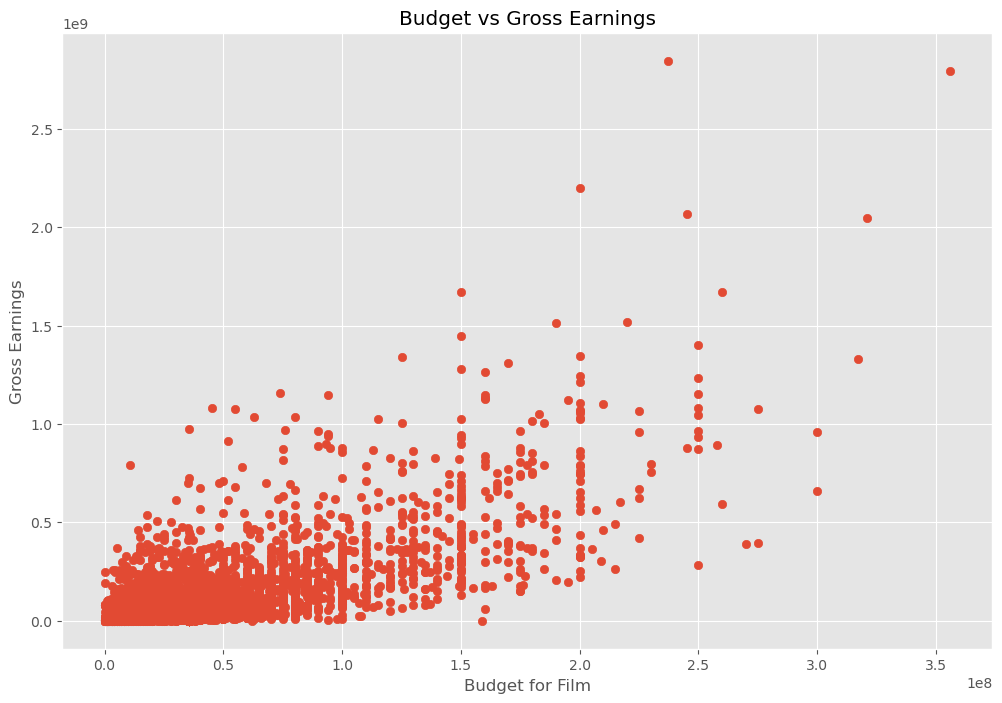

In [10]:
# build a scatterplot comparing budget and revenue

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

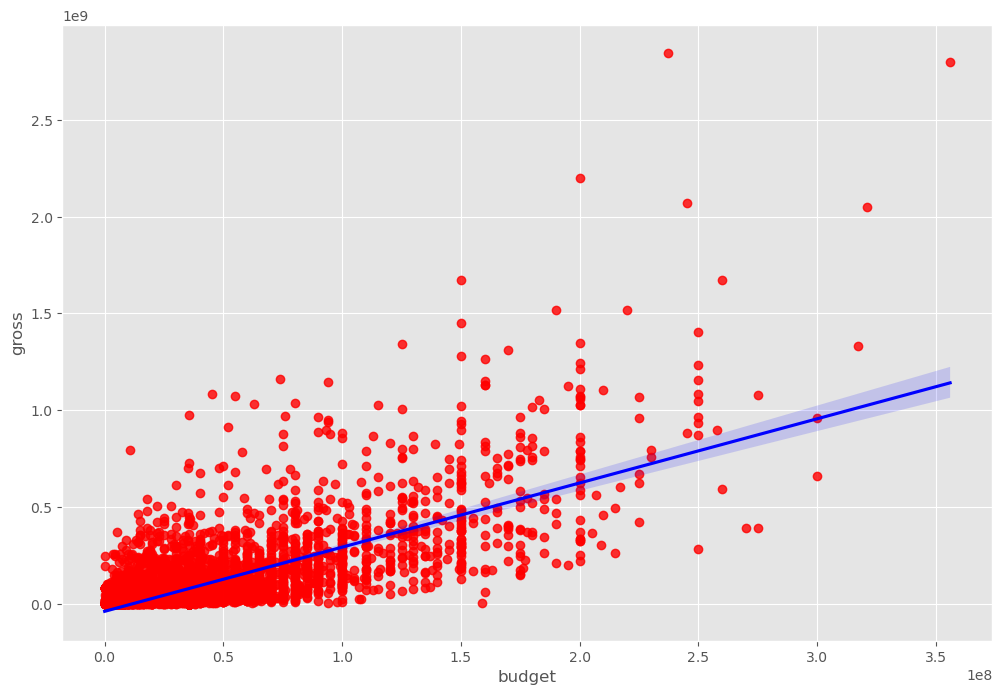

In [11]:
# plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

In [12]:
# looking at correlations
df.corr() #pearson, kendall, spearman


,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.265578,0.252042,0.120811
score,0.097995,1.000000,0.409182,0.064554,0.182868,0.399451
votes,0.222945,0.409182,1.000000,0.421090,0.628713,0.309212
budget,0.265578,0.064554,0.421090,1.000000,0.711270,0.265305
gross,0.252042,0.182868,0.628713,0.711270,1.000000,0.241336
runtime,0.120811,0.399451,0.309212,0.265305,0.241336,1.000000


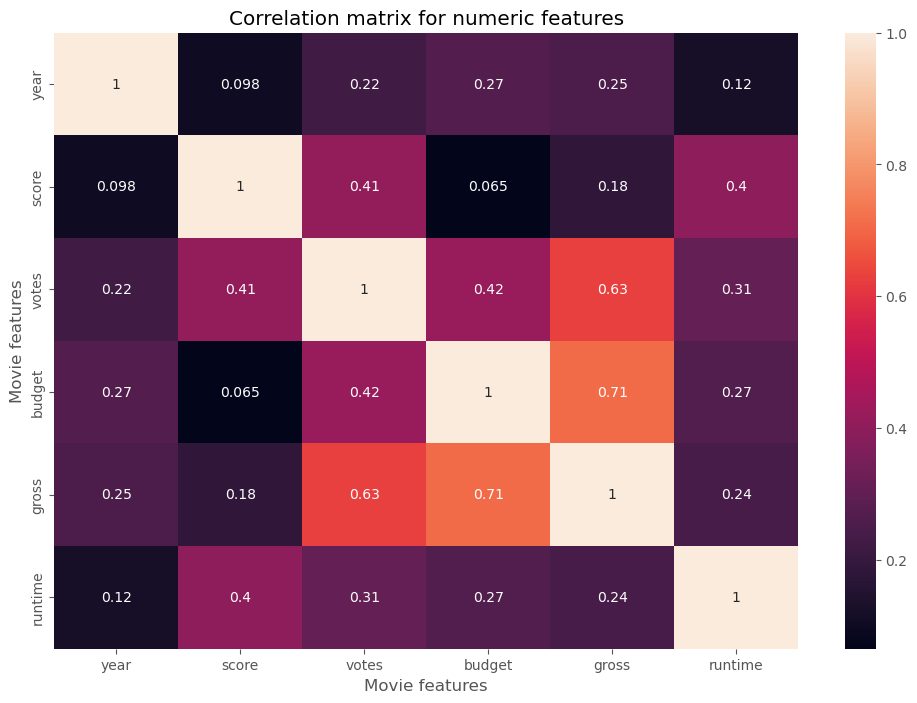

In [13]:
# High correlation between budget and gross

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True)


plt.title('Correlation matrix for numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [14]:
# Looking at company, a non-numeric variable

# Assuming your DataFrame is named df
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

# Print the updated DataFrame
print(df_numerized.head()) 

   name  rating  genre  year  released  score      votes  director  writer  \
0  6587       6      6  1980      1705    8.4   927000.0      2589    4014   
1  5573       6      1  1980      1492    5.8    65000.0      2269    1632   
2  5142       4      0  1980      1771    8.7  1200000.0      1111    2567   
3   286       4      4  1980      1492    7.7   221000.0      1301    2000   
4  1027       6      4  1980      1543    7.3   108000.0      1054     521   

   star  country    budget      gross  company  runtime  
0  1047       54  19000000   46998772     2319    146.0  
1   327       55   4500000   58853106      731    104.0  
2  1745       55  18000000  538375067     1540    124.0  
3  2246       55   3500000   83453539     1812     88.0  
4   410       55   6000000   39846344     1777     98.0  


In [15]:
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


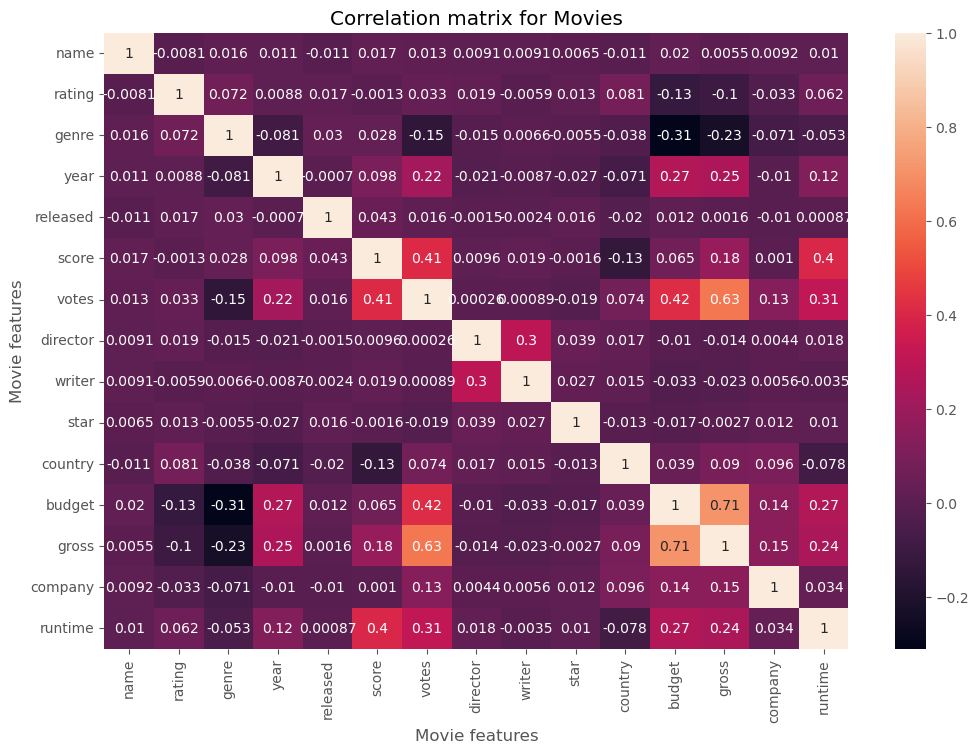

In [16]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [17]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name      name        1.000000
          rating     -0.008069
          genre       0.016355
          year        0.011453
          released   -0.011311
          score       0.017097
          votes       0.013088
          director    0.009079
          writer      0.009081
          star        0.006472
          country    -0.010737
          budget      0.020368
          gross       0.005466
          company     0.009211
          runtime     0.010392
rating    name       -0.008069
          rating      1.000000
          genre       0.072423
          year        0.008779
          released    0.016613
          score      -0.001314
          votes       0.033225
          director    0.019483
          writer     -0.005921
          star        0.013405
          country     0.081244
          budget     -0.126046
          gross      -0.102116
          company    -0.032943
          runtime     0.062145
genre     name        0.016355
          rating      0.072423
        

In [18]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget    genre      -0.310566
genre     budget     -0.310566
gross     genre      -0.230267
genre     gross      -0.230267
votes     genre      -0.145307
genre     votes      -0.145307
score     country    -0.133348
country   score      -0.133348
rating    budget     -0.126046
budget    rating     -0.126046
gross     rating     -0.102116
rating    gross      -0.102116
year      genre      -0.081261
genre     year       -0.081261
country   runtime    -0.078412
runtime   country    -0.078412
company   genre      -0.071067
genre     company    -0.071067
country   year       -0.070938
year      country    -0.070938
runtime   genre      -0.052711
genre     runtime    -0.052711
          country    -0.037615
country   genre      -0.037615
writer    budget     -0.033216
budget    writer     -0.033216
company   rating     -0.032943
rating    company    -0.032943
star      year       -0.027242
year      star       -0.027242
gross     writer     -0.023210
writer    gross      -0.023210
director

In [19]:
high_corr = sorted_pairs[sorted_pairs > 0.5]

high_corr

gross     votes       0.628713
votes     gross       0.628713
budget    gross       0.711270
gross     budget      0.711270
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [20]:
# votes and budget have the highest correlation to gross
